In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
!pip install -q torchaudio
SAMPLING_RATE = 16000

import torch
torch.set_num_threads(1)

from IPython.display import Audio
from pprint import pprint
import glob

In [3]:
USE_ONNX = False 
if USE_ONNX:
    !pip install -q onnxruntime
  
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True,
                              onnx=USE_ONNX)
(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

Downloading: "https://github.com/snakers4/silero-vad/archive/master.zip" to /root/.cache/torch/hub/master.zip


In [ ]:
j = 0
for name in glob.glob('/content/drive/MyDrive/Data/*.wav'):
    wav = read_audio(name, sampling_rate = SAMPLING_RATE)
    speech_timestamps = get_speech_timestamps(wav, model, threshold=0.5, sampling_rate=SAMPLING_RATE)

    sum = 0
    k = 0   
    speech_timestamps_mini = []
    mini_audio = []

    while(True):
        sum =  sum + speech_timestamps[k]['end'] - speech_timestamps[k]['start'] 
        speech_timestamps_mini.append(speech_timestamps[k])
        
        if k < len(speech_timestamps)-1:
            k = k + 1
            if sum >= 48000:      
                mini_audio.append(collect_chunks(speech_timestamps_mini, wav))
                speech_timestamps_mini.clear()
                sum = 0
                continue
            else:
                continue
        else:
            mini_audio.append(collect_chunks(speech_timestamps_mini, wav))
            speech_timestamps_mini.clear()
            sum = 0
            break   
                    
    for i in mini_audio:
        save_audio('/content/drive/MyDrive/WAV_VAD/' + str(j) + '.wav', i, sampling_rate = SAMPLING_RATE)
        j = j + 1 

In [4]:
!pip install librosa
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import librosa
import matplotlib.pyplot as plt


audio_duration = []
array_audio = [0]*7

for name2 in glob.glob('/content/drive/MyDrive/WAV_VAD/*.wav'):
    audio_duration.append(librosa.get_duration(filename = name2))


for i in range(len(audio_duration)):
    if(audio_duration[i] < 1.0):
        array_audio[0] = array_audio[0] + 1
    elif 1.0 <= audio_duration[i] < 3.0:
        array_audio[1] = array_audio[1] + 1
    elif 3.0 <= audio_duration[i] < 5.0:
        array_audio[2] = array_audio[2] + 1
    elif 5.0 <= audio_duration[i] < 10:
        array_audio[3] = array_audio[3] + 1
    elif 10.0 <= audio_duration[i] < 20.0:
        array_audio[4] = array_audio[4] + 1
    elif 20.0 <= audio_duration[i] < 30.0 :
        array_audio[5] = array_audio[5] + 1
    elif audio_duration[i] >= 30.0:
        array_audio[6] = array_audio[6] + 1

print(array_audio)


[25, 96, 1094, 995, 454, 89, 29]


In [6]:
import librosa
import os

Text(0, 0.5, 'Number audio')

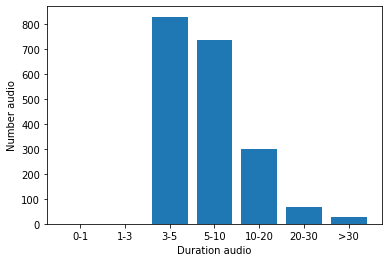

In [7]:
plt.bar(['0-1', '1-3', '3-5', '5-10', '10-20', '20-30', '>30'], array_audio)
plt.xlabel('Duration audio')
plt.ylabel('Number audio')

In [8]:
import librosa
j = 3000
for name3 in glob.glob('/content/drive/MyDrive/WAV_VAD/*.wav'):
    file1 = librosa.get_duration(filename = name3)
    if file1 >= 10.0:
        wav = read_audio(name3, sampling_rate = SAMPLING_RATE)
        speech_timestamps1 = get_speech_timestamps(wav, model, threshold=0.9, sampling_rate=SAMPLING_RATE)
        sum = 0
        k = 0   
        speech_timestamps_mini = []
        mini_audio = []

        if len(speech_timestamps1) != 0:
            while(True):          
                sum =  sum + speech_timestamps1[k]['end'] - speech_timestamps1[k]['start']
                    
                speech_timestamps_mini.append(speech_timestamps1[k])
                    
                if k < len(speech_timestamps1)-1:
                    k = k + 1
                    if sum >= 48000:      
                        mini_audio.append(collect_chunks(speech_timestamps_mini, wav))
                        speech_timestamps_mini.clear()
                        sum = 0
                        continue
                    else:
                        continue
                else:
                    mini_audio.append(collect_chunks(speech_timestamps_mini, wav))
                    speech_timestamps_mini.clear()
                    sum = 0
                    break
        else:
            continue
                            
        for i in mini_audio:
            save_audio('/content/drive/MyDrive/WAV_VAD/' + str(j) + '.wav', i, sampling_rate = SAMPLING_RATE)
            j = j + 1 
            

Text(0, 0.5, 'Number audio')

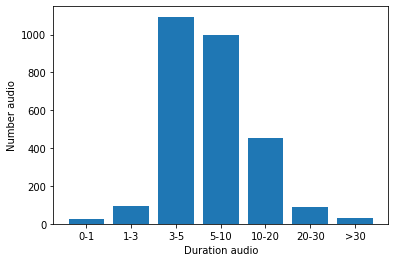

In [10]:
plt.bar(['0-1', '1-3', '3-5', '5-10', '10-20', '20-30', '>30'], array_audio)
plt.xlabel('Duration audio')
plt.ylabel('Number audio')

In [11]:
import os

for i in glob.glob('/content/drive/MyDrive/WAV_VAD/*.wav'):
    x = librosa.get_duration(filename = i)
    if x > 10.0 or x < 3.0:
        os.remove(i)

[0, 0, 1094, 995, 0, 0, 0]


Text(0, 0.5, 'Number audio')

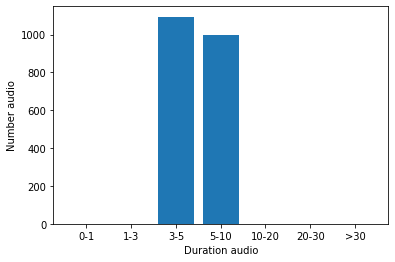

In [13]:
import librosa
import matplotlib.pyplot as plt


audio_duration = []
array_audio = [0]*7

for name2 in glob.glob('/content/drive/MyDrive/WAV_VAD/*.wav'):
    audio_duration.append(librosa.get_duration(filename = name2))


for i in range(len(audio_duration)):
    if(audio_duration[i] < 1.0):
        array_audio[0] = array_audio[0] + 1
    elif 1.0 <= audio_duration[i] < 3.0:
        array_audio[1] = array_audio[1] + 1
    elif 3.0 <= audio_duration[i] < 5.0:
        array_audio[2] = array_audio[2] + 1
    elif 5.0 <= audio_duration[i] < 10:
        array_audio[3] = array_audio[3] + 1
    elif 10.0 <= audio_duration[i] < 20.0:
        array_audio[4] = array_audio[4] + 1
    elif 20.0 <= audio_duration[i] < 30.0 :
        array_audio[5] = array_audio[5] + 1
    elif audio_duration[i] >= 30.0:
        array_audio[6] = array_audio[6] + 1

print(array_audio)

plt.bar(['0-1', '1-3', '3-5', '5-10', '10-20', '20-30', '>30'], array_audio)
plt.xlabel('Duration audio')
plt.ylabel('Number audio')

In [14]:
x = glob.glob('/content/drive/MyDrive/WAV_VAD/*.wav')
print(len(x))

2089


In [15]:
s = 0
for i in x:
  s = s + librosa.get_duration(filename = i )
print(s)

11178.251999999942
